<a href="https://colab.research.google.com/github/lakshmipriya-ragupathi/ml_algorithms/blob/main/LOGISTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, show
from google.colab import drive

from sklearn.preprocessing import LabelEncoder

'''
 Divide your code into Five Section: 
 (1) Data collection 
 (2) Data Analysis 
 (3) Data Wrangling 
 (4) Train and Test model  
 (5) Performance Analysis. 
 For Reference(see Logistic_titanic.pdf. Sections must be explicitly mentioned in the code. Split data in 80-20) .
'''


'\n Divide your code into Five Section: \n (1) Data collection \n (2) Data Analysis \n (3) Data Wrangling \n (4) Train and Test model  \n (5) Performance Analysis. \n For Reference(see Logistic_titanic.pdf. Sections must be explicitly mentioned in the code. Split data in 80-20) .\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/srinithi_proj/bmd.csv'

df = pd.read_csv(path)
print(df.head(5))
print(df.info())
df.isnull().sum()

      id        age sex     fracture  weight_kg  height_cm      medication  \
0    469  57.052768   F  no fracture       64.0      155.5  Anticonvulsant   
1   8724  75.741225   F  no fracture       78.0      162.0   No medication   
2   6736  70.778900   M  no fracture       73.0      170.5   No medication   
3  24180  78.247175   F  no fracture       60.0      148.0   No medication   
4  17072  54.191877   M  no fracture       55.0      161.0   No medication   

   waiting_time     bmd  
0            18  0.8793  
1            56  0.7946  
2            10  0.9067  
3            14  0.7112  
4            20  0.7909  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_k

id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

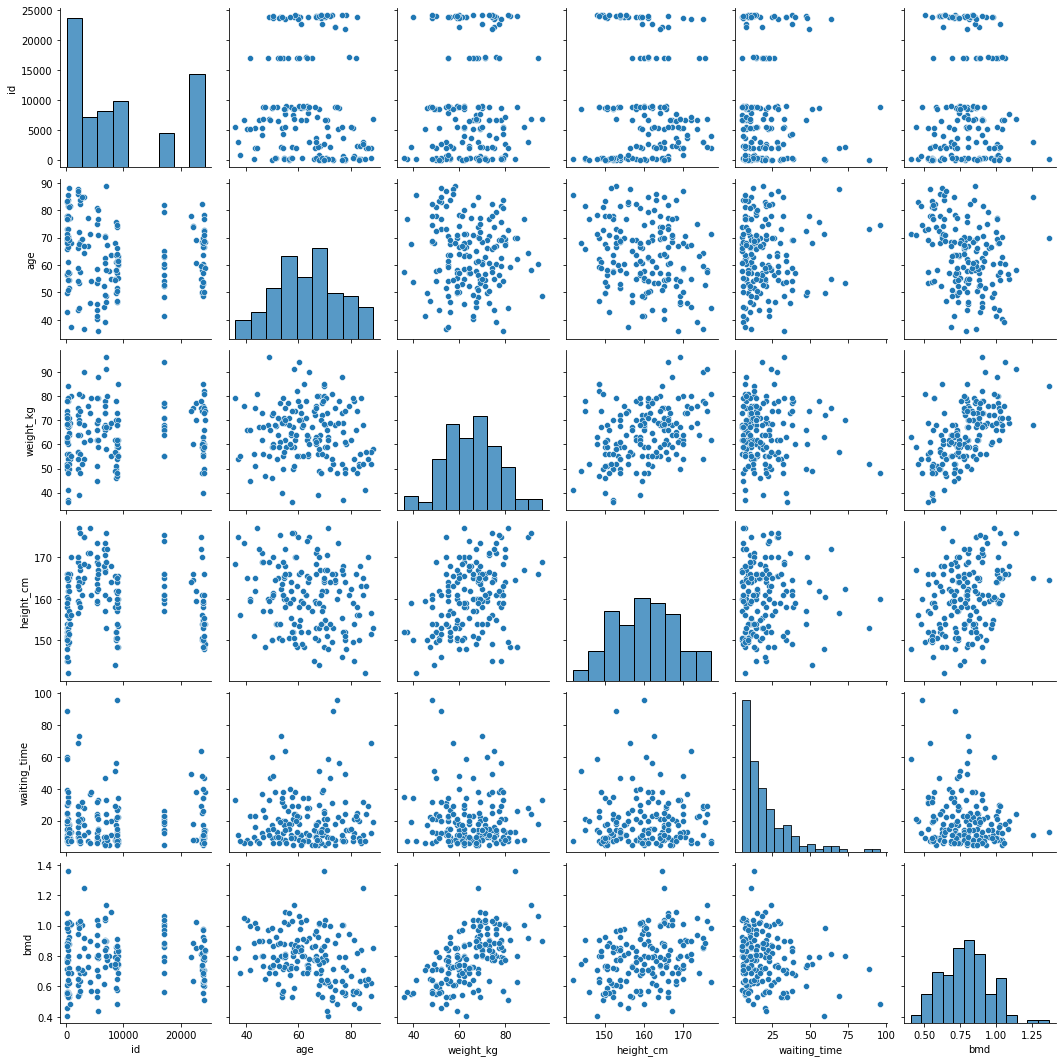

In [4]:
import seaborn as sns
sns.pairplot(data = df)

In [5]:
le = LabelEncoder()
label = le.fit_transform(df['medication'])
print(len(label))
print(label)
df['medication'] = label
print(df.head(5))

169
[0 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 1 2 1 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 1 2 2 1 2 0 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 1 2 0 2 0 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2]
      id        age sex     fracture  weight_kg  height_cm  medication  \
0    469  57.052768   F  no fracture       64.0      155.5           0   
1   8724  75.741225   F  no fracture       78.0      162.0           2   
2   6736  70.778900   M  no fracture       73.0      170.5           2   
3  24180  78.247175   F  no fracture       60.0      148.0           2   
4  17072  54.191877   M  no fracture       55.0      161.0           2   

   waiting_time     bmd  
0            18  0.8793  
1            56  0.7946  
2            10  0.9067  
3            14  0.7112  
4            20  0.7909  


In [6]:
label_2 = le.fit_transform(df['sex'])
label_3 = le.fit_transform(df['fracture'])
df['sex'] = label_2
df['fracture'] = label_3
print(df.head(5))

      id        age  sex  fracture  weight_kg  height_cm  medication  \
0    469  57.052768    0         1       64.0      155.5           0   
1   8724  75.741225    0         1       78.0      162.0           2   
2   6736  70.778900    1         1       73.0      170.5           2   
3  24180  78.247175    0         1       60.0      148.0           2   
4  17072  54.191877    1         1       55.0      161.0           2   

   waiting_time     bmd  
0            18  0.8793  
1            56  0.7946  
2            10  0.9067  
3            14  0.7112  
4            20  0.7909  


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('medication', axis = 1))
scaled_features = scaler.transform(df.drop('medication', axis = 1))
scaled_df = pd.DataFrame(scaled_features,columns = df.drop('medication', axis = 1).columns)
scaled_df

,id,age,sex,fracture,weight_kg,height_cm,waiting_time,bmd
0,-0.990233,-0.533977,-1.017912,0.648204,-0.057870,-0.601464,-0.110427,0.579369
1,-0.043419,0.982904,-1.017912,0.648204,1.159205,0.220824,2.301696,0.069237
2,-0.271434,0.580128,0.982403,0.648204,0.724535,1.296122,-0.618243,0.744394
3,1.729320,1.186304,-1.017912,0.648204,-0.405606,-1.550257,-0.364335,-0.433065
4,0.914062,-0.766186,0.982403,0.648204,-0.840276,0.094318,0.016527,0.046953
...,...,...,...,...,...,...,...,...
164,1.466896,1.164824,0.982403,-1.542725,0.811469,0.473835,1.857358,0.066226
165,1.724732,-1.083269,-1.017912,-1.542725,-0.492540,0.094318,-0.872151,0.084294
166,-0.244710,-1.401896,0.982403,-1.542725,0.202932,1.106364,-0.618243,0.124045
167,-0.412625,-0.717770,0.982403,-1.542725,0.463733,0.726846,-0.364335,0.145125


Box plot for column  age


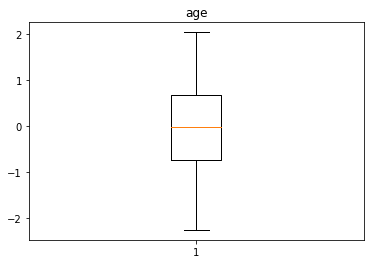

Revised box plot : 


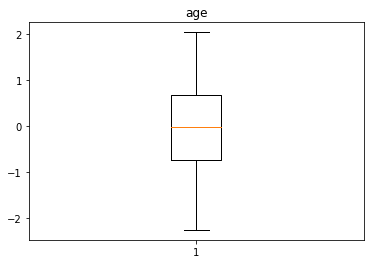

Low outliers count :  0
High outliers count:  0


Box plot for column  sex


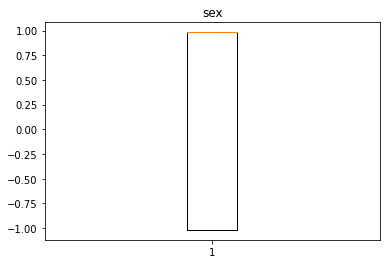

Revised box plot : 


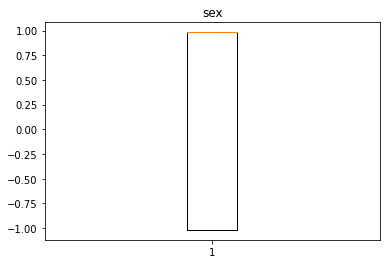

Low outliers count :  0
High outliers count:  0


Box plot for column  fracture


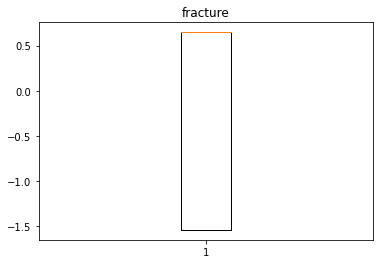

Revised box plot : 


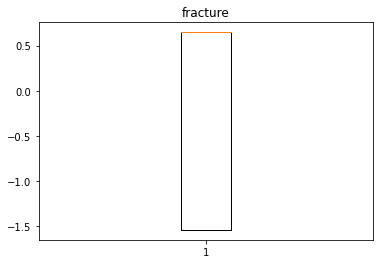

Low outliers count :  0
High outliers count:  0


Box plot for column  weight_kg


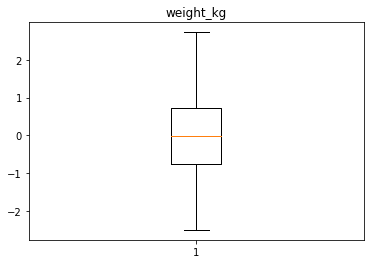

Revised box plot : 


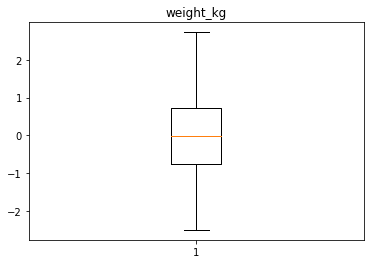

Low outliers count :  0
High outliers count:  0


Box plot for column  height_cm


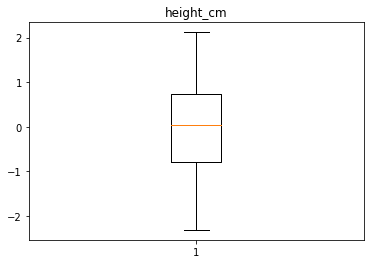

Revised box plot : 


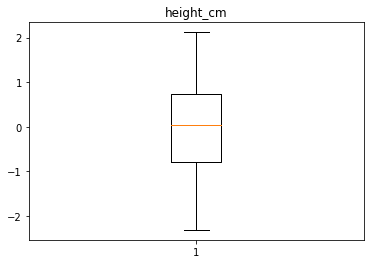

Low outliers count :  0
High outliers count:  0


Box plot for column  waiting_time


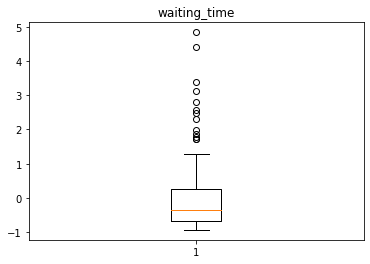

Revised box plot : 


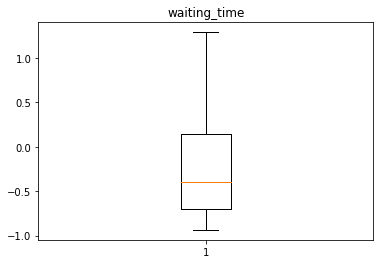

Low outliers count :  0
High outliers count:  0


Box plot for column  bmd


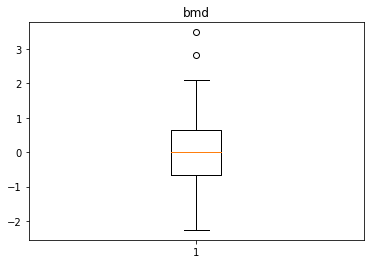

Revised box plot : 


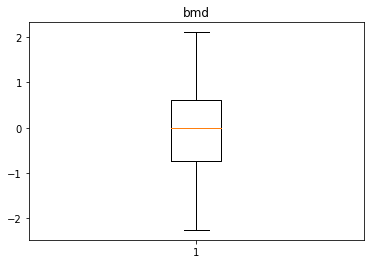

Low outliers count :  0
High outliers count:  0




In [8]:
for column in scaled_df:
  if column != 'medication' and column != 'id':
    print('Box plot for column ', column)
    plt.title(column)
    plt.boxplot(scaled_df[column])
    plt.show()
    q1 = np.percentile(scaled_df[column], 25, interpolation = 'midpoint')
    q3 = np.percentile(scaled_df[column], 75, interpolation = 'midpoint')
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    df1 = scaled_df.loc[scaled_df[column] >= lower_bound]
    df2 = df1.loc[scaled_df[column] <= upper_bound]
    cur_low_df = df2.loc[df2[column] <= lower_bound]
    cur_high_df = df2.loc[df2[column] >= upper_bound]
    print("Revised box plot : ")
    plt.title(column)
    plt.boxplot(df2[column])
    plt.show()
    print("Low outliers count : ", len(cur_low_df))
    print("High outliers count: ", len(cur_high_df))
    print()
    print()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = scaled_df
y= df["medication"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=LogisticRegression()
model.fit(X_train,y_train)

#performance analysis

y_pred = model.predict(X_test)

from sklearn import metrics
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
dt_precision = metrics.precision_score(y_test, y_pred, average='micro')
dt_recall = metrics.recall_score(y_test, y_pred, average='micro')

print("Accuracy : ", "{0:.2f}".format(dt_accuracy*100), "%")
print("Precision : ", "{0:.2f}".format(dt_precision*100), "%")
print("Recall : ", "{0:.2f}".format(dt_recall*100), "%")

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

dt_Time = (time.time() - start_time)
print(model.score(X_test, y_test))

Accuracy :  79.41 %
Precision :  79.41 %
Recall :  79.41 %
--- 4.410743713378906e-05 seconds ---
0.7941176470588235
